<a href="https://colab.research.google.com/github/chi19961026/Customer-Churn-Analysis/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries and methods/functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/2024 Summer Project/Machine Learning/Customer Churn Prediction_IBM data_240522/Dataset/Telco_customer_churn.csv")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
print(df.isnull().sum())

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


In [ ]:
display(df.describe())

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


From the above table i acquired following insights:

1. The total churn rate is 26.54%
2. Tenure Months and Monthly Charges seems fine, no extreme data needed to deal with
3. more than 50% of the customer has tenure more than 2 years(24 months)

# EDA

#### Who Churn?

In [ ]:
# Create pivot tables for categorical columns to explore the churn situation under different dimensions

columns = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
    'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
    'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
    'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'
]

pivot_tables = {}

for column in columns:
    pt = df.pivot_table(index=column, values='Churn Value', aggfunc=['count', 'sum'])
    pt["Churn %"] = round(pt["sum"]/pt["count"], 2)
    pivot_tables[column] = pt

# Display the pivot tables
for column, pt in pivot_tables.items():
    print(f"Pivot Table for {column}:\n{pt}\n")


Pivot Table for Gender:
             count         sum Churn %
       Churn Value Churn Value        
Gender                                
Female        3488         939    0.27
Male          3555         930    0.26

Pivot Table for Senior Citizen:
                     count         sum Churn %
               Churn Value Churn Value        
Senior Citizen                                
No                    5901        1393    0.24
Yes                   1142         476    0.42

Pivot Table for Partner:
              count         sum Churn %
        Churn Value Churn Value        
Partner                                
No             3641        1200    0.33
Yes            3402         669    0.20

Pivot Table for Dependents:
                 count         sum Churn %
           Churn Value Churn Value        
Dependents                                
No                5416        1763    0.33
Yes               1627         106    0.07

Pivot Table for Tenure Months:
           

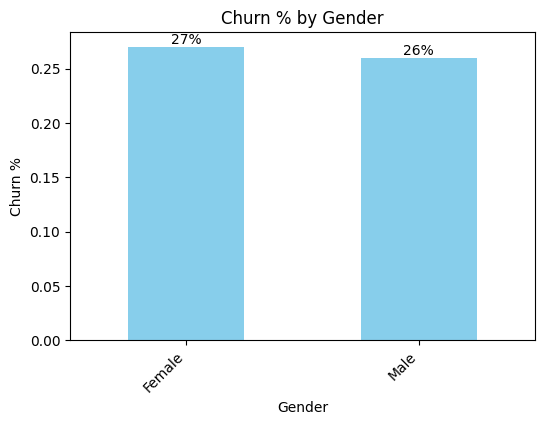

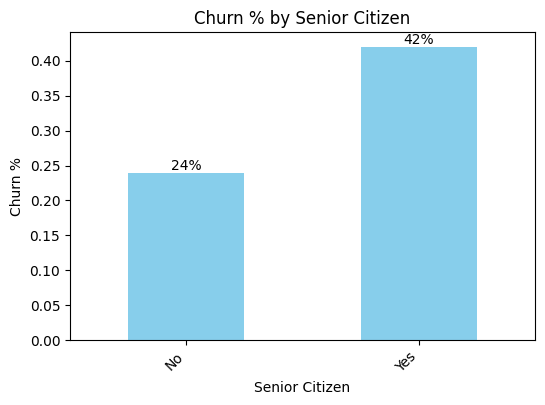

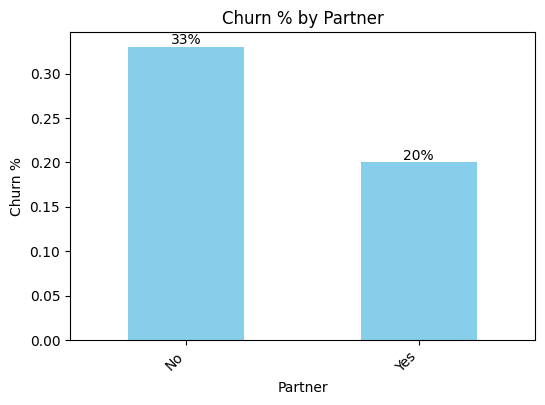

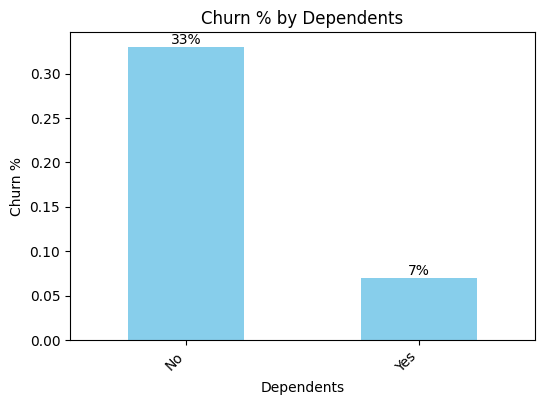

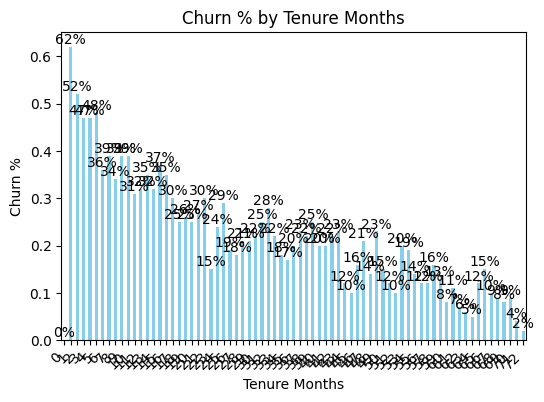

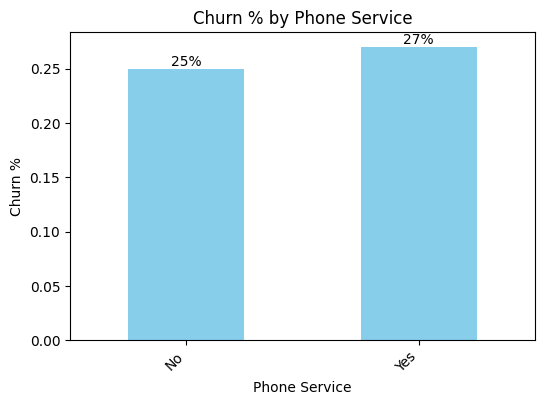

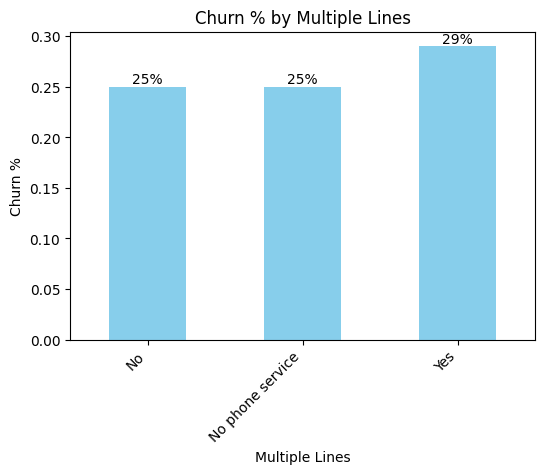

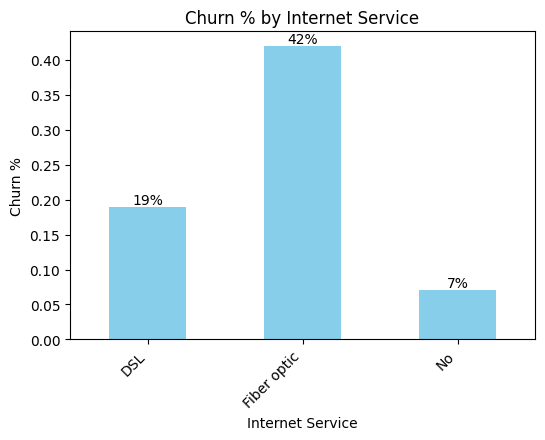

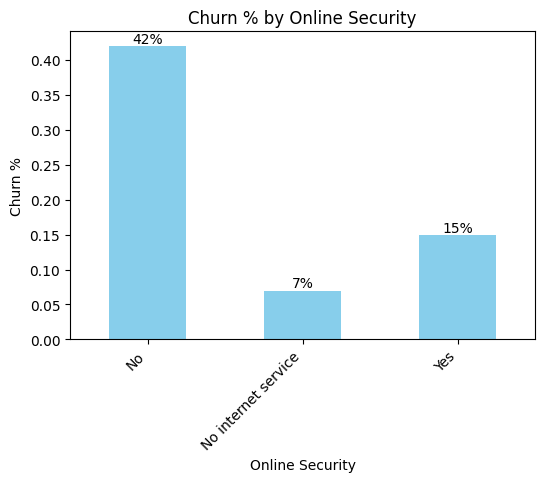

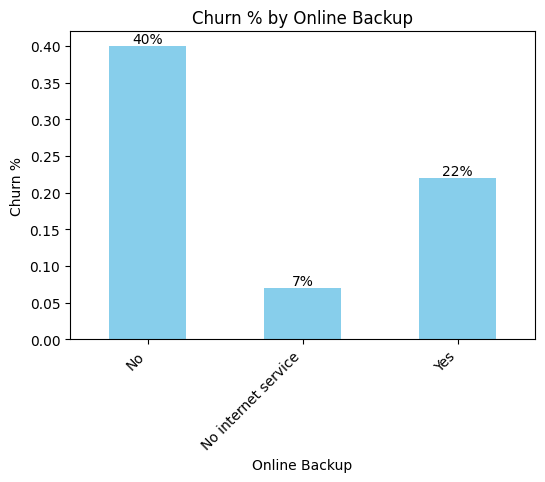

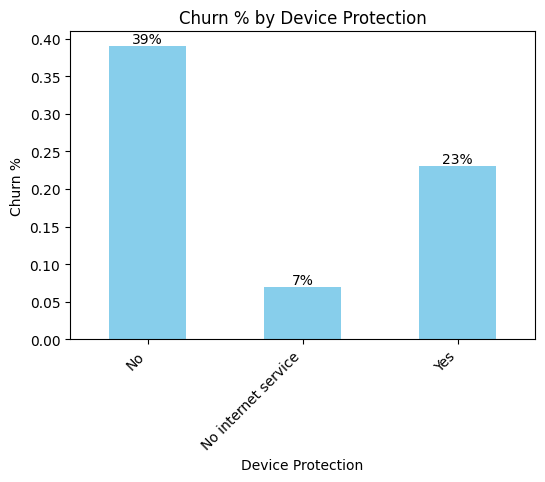

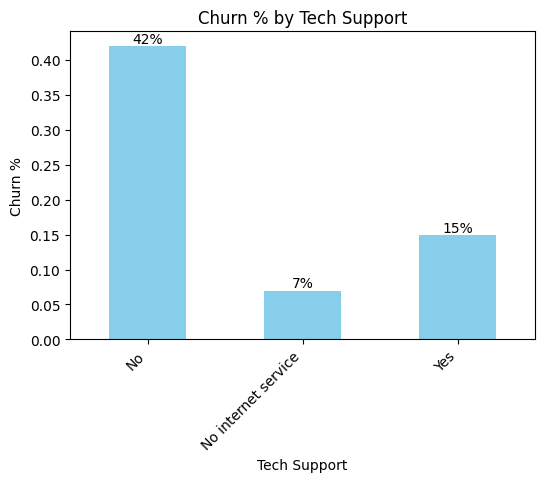

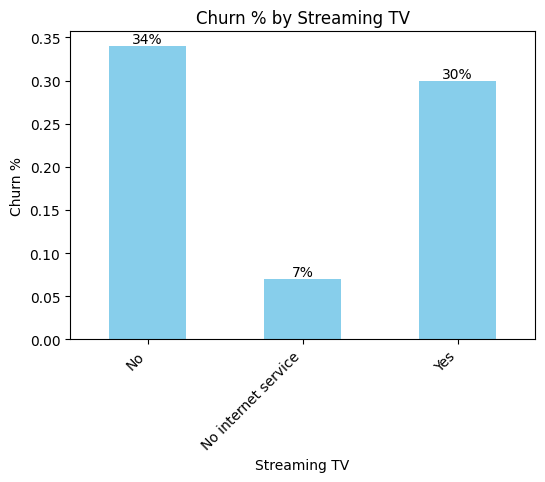

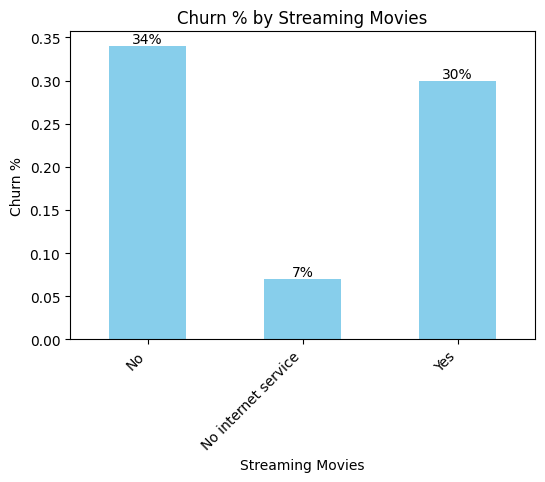

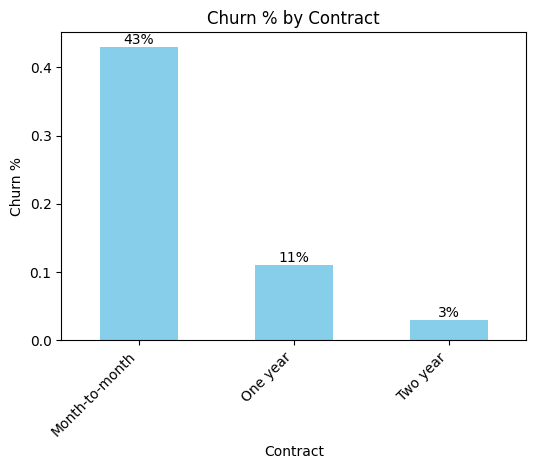

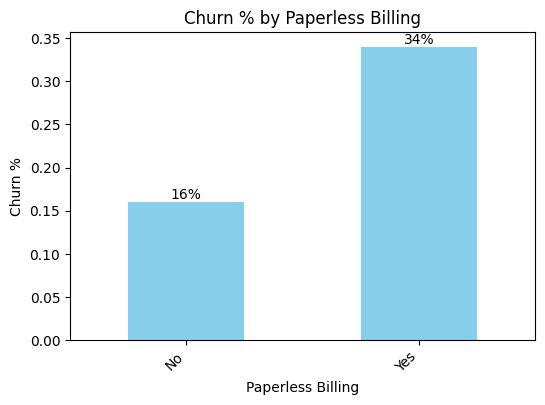

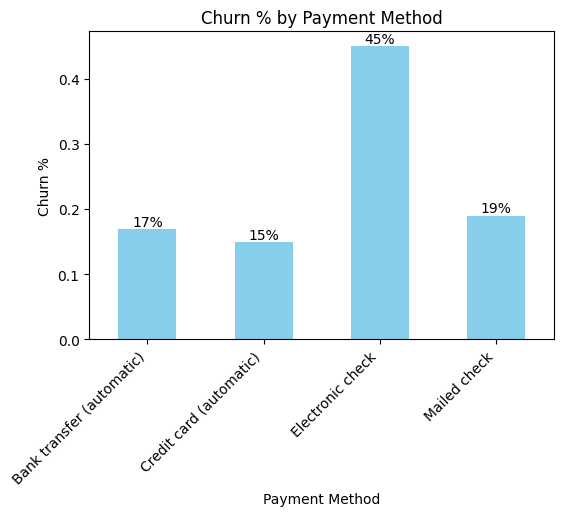

In [ ]:
# import matplotlib.pyplot as plt
# # Plotting bar charts for each pivot table
# for column, pt in pivot_tables.items():
#     # Create a figure and axis
#     fig, ax = plt.subplots(figsize=(6, 4))

#     # Plotting the churn percentage
#     pt['Churn %'].plot(kind='bar', ax=ax, color='skyblue')

#     # Setting titles and labels
#     ax.set_title(f'Churn % by {column}')
#     ax.set_xlabel(column)
#     ax.set_ylabel('Churn %')

#     # Rotating x-axis labels for better readability
#     plt.xticks(rotation=45, ha='right')

#     # Display the plot
#     plt.show()

import matplotlib.pyplot as plt

# Plotting bar charts for each pivot table
for column, pt in pivot_tables.items():
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(6, 4))

    # Plotting the churn percentage
    bars = pt['Churn %'].plot(kind='bar', ax=ax, color='skyblue')

    # Setting titles and labels
    ax.set_title(f'Churn % by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Churn %')

    # Rotating x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Adding text labels on the bars
    for bar in bars.patches:
        # Using bar.get_height to get the height of the bar,
        # and bar.get_x() + bar.get_width() / 2 to calculate center position of the bar
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()*100:.0f}%',
                ha='center', va='bottom')

    # Display the plot
    plt.show()


Summary of Churn Characteristics

[Not quite impactful]
* Gender
* Partner
* Phone Service
* Multiple Lines
* Streaming TV
* Streaming Movies


[impactful]
* Dependents
* Partner
* Senior Citizen
* Internet Service
* Online Security
* Online Backup
* Device Protection
* Tech Support
* Contract
* Paperless Billing
* Payment Method- Electronic check has very high churn rate compare to other methods

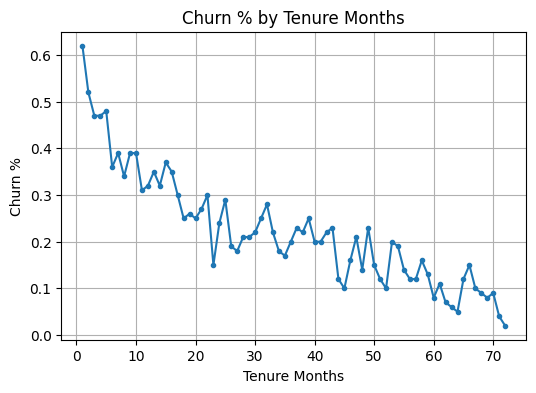

In [ ]:
# Extract the pivot table for 'Tenure Months'
tenure_months_pivot = pivot_tables['Tenure Months'][1:]

# Plotting the line chart
plt.figure(figsize=(6, 4))
plt.plot(tenure_months_pivot.index, tenure_months_pivot['Churn %'], marker='.')
plt.title('Churn % by Tenure Months')
plt.xlabel('Tenure Months')
plt.ylabel('Churn %')
plt.grid(True)
plt.show()


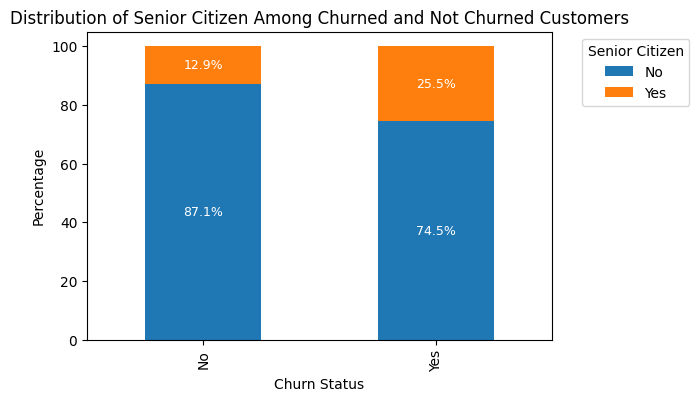

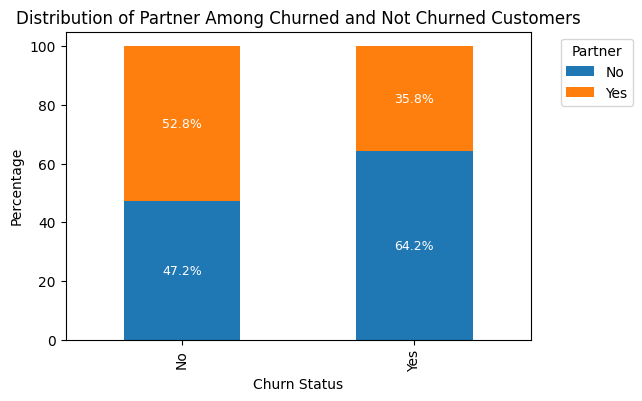

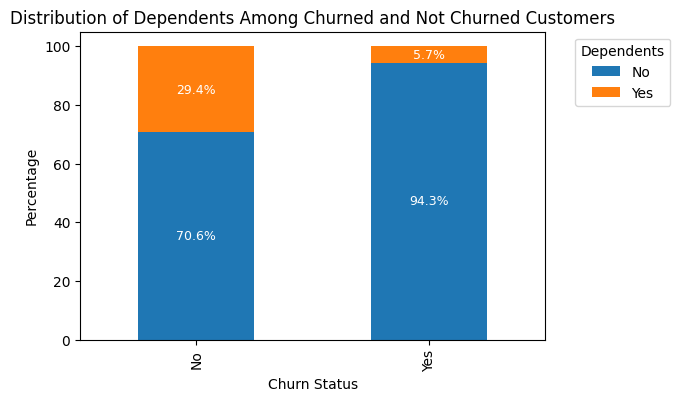

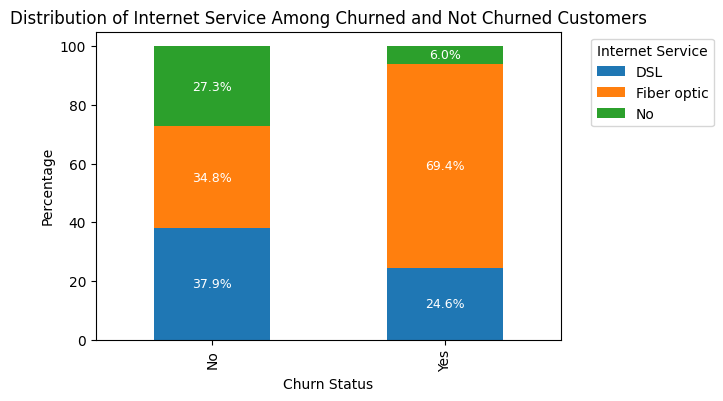

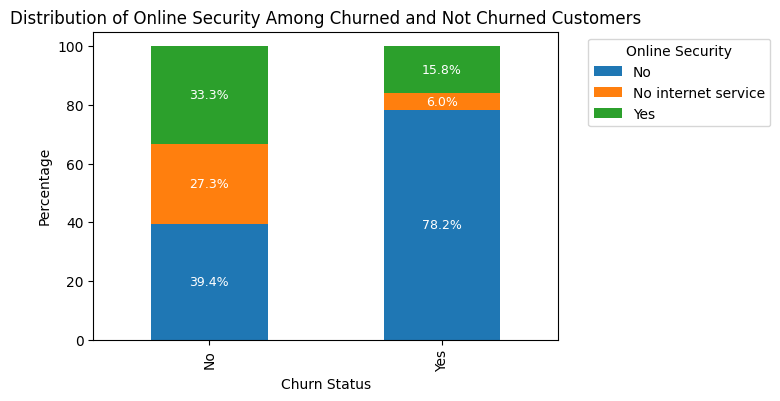

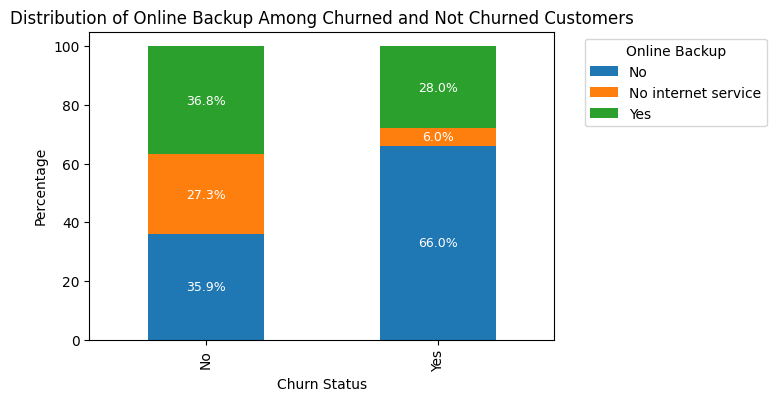

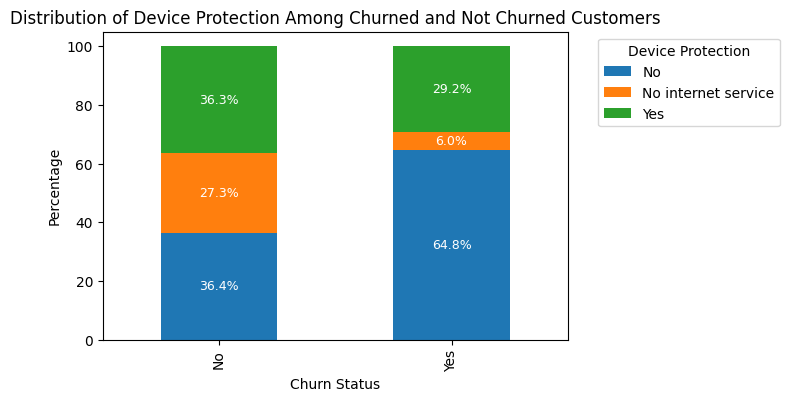

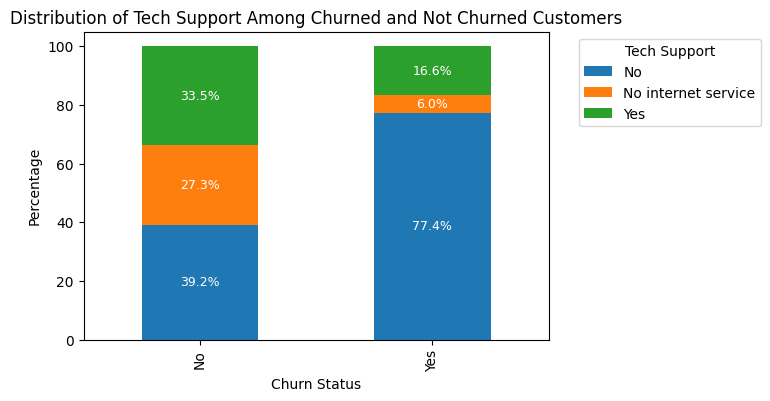

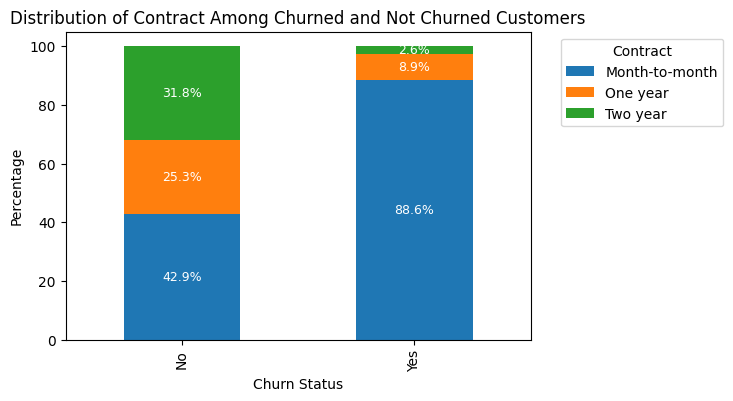

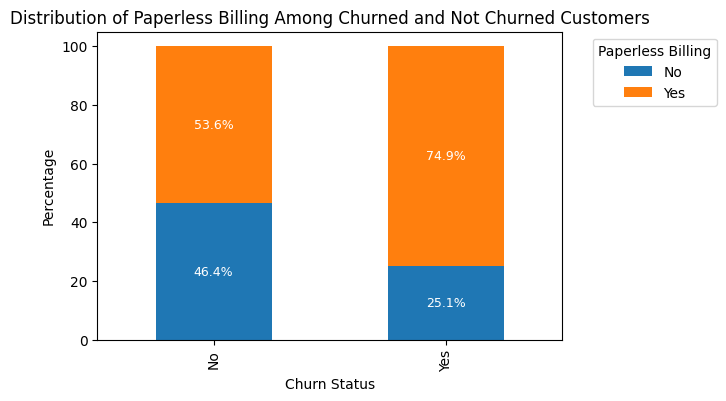

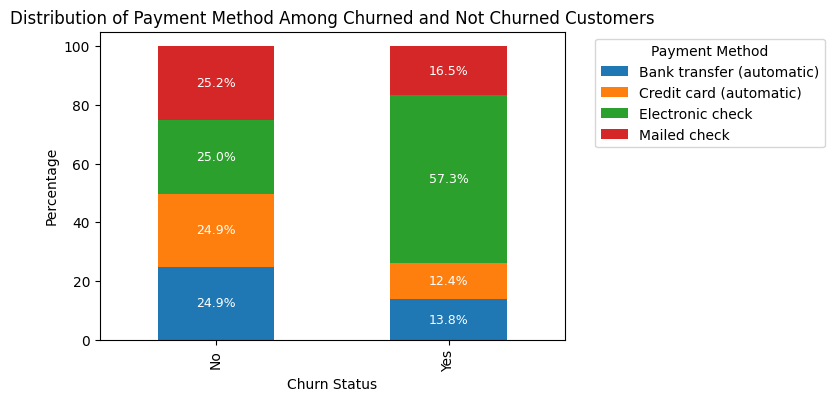

In [ ]:
columns_2 = [
   'Senior Citizen', 'Partner', 'Dependents', 'Internet Service',
   'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Contract',
   'Paperless Billing', 'Payment Method'
]

def plot_stacked_bars(dataframe, columns):
    for column in columns:
        grouped = dataframe.groupby(['Churn Label', column]).size().unstack(fill_value=0)
        grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

        ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(6, 4))
        ax.set_title(f'Distribution of {column} Among Churned and Not Churned Customers')
        ax.set_xlabel('Churn Status')
        ax.set_ylabel('Percentage')
        ax.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')

        # Annotating the percentage on the bars
        for rec in ax.patches:
            height = rec.get_height()
            if height > 0:  # only display if there's height (or percentage) to show
                x = rec.get_x() + rec.get_width() / 2
                y = rec.get_y() + rec.get_height() / 2
                label = f"{height:.1f}%"
                ax.text(x, y, label, ha='center', va='center', color='white', fontsize=9)

        plt.show()

# Call the function
plot_stacked_bars(df, columns_2)

#### Why churn (churn reason)?



In [ ]:
# Remove null values from 'Churn Reason'
churn_reasons = df['Churn Reason'].dropna()

# Count the occurrence of each unique reason
reason_counts = churn_reasons.value_counts()
total = reason_counts.sum()
percentages = (reason_counts / total * 100).round(2)  # Round to two decimal places

# Create a DataFrame to display the table
table = pd.DataFrame({
    'Churn Reason': reason_counts.index,
    'Count': reason_counts.values,
    'Percentage': percentages.values
})

# Print the DataFrame
print(table)


                                 Churn Reason  Count  Percentage
0                  Attitude of support person    192       10.27
1   Competitor offered higher download speeds    189       10.11
2                Competitor offered more data    162        8.67
3                                  Don't know    154        8.24
4                Competitor made better offer    140        7.49
5                Attitude of service provider    135        7.22
6               Competitor had better devices    130        6.96
7                         Network reliability    103        5.51
8                     Product dissatisfaction    102        5.46
9                              Price too high     98        5.24
10                    Service dissatisfaction     89        4.76
11            Lack of self-service on Website     88        4.71
12                         Extra data charges     57        3.05
13                                      Moved     53        2.84
14                  Limit

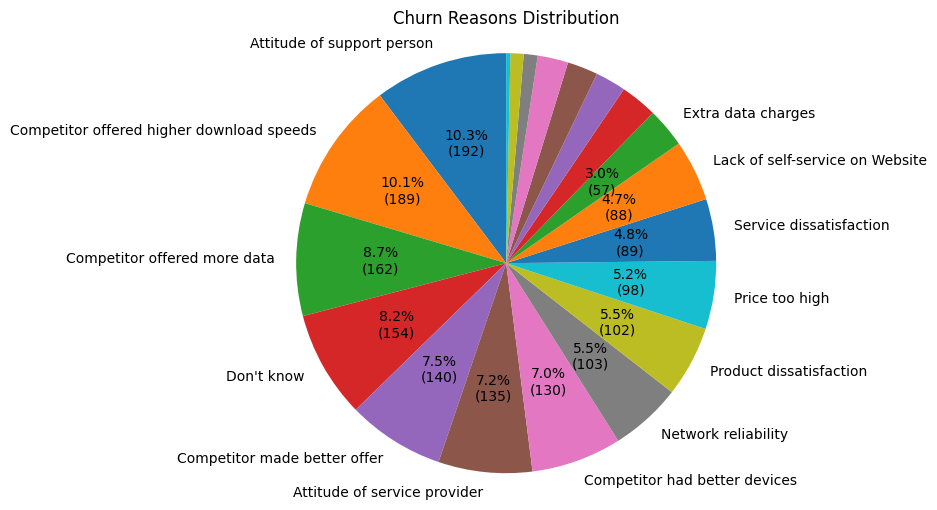

In [ ]:
# Function to only show labels for percentages >= 3%
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if pct >= 3:
            return '{p:.1f}%\n({v:d})'.format(p=pct, v=val)
        return ''
    return my_autopct

# Filter labels: only display if the percentage is >= 3%
labels = [label if value / reason_counts.sum() >= 0.03 else '' for label, value in zip(reason_counts.index, reason_counts)]

plt.figure(figsize=(8, 6))
plt.pie(reason_counts, labels=labels, autopct=autopct_format(reason_counts), startangle=90)
plt.title('Churn Reasons Distribution')
plt.axis('equal')  # Ensures that pie is drawn as a circle.

plt.show()

In [ ]:
def categorize_reason(reason):
    if pd.isnull(reason):
        return 'Unknown'  # Handle NaN or None values
    reason = str(reason).lower()  # Ensure input is treated as string and in lowercase
    if any(keyword in reason for keyword in ['attitude', 'expertise', 'network', 'dissatisfaction']):
        return 'Service Quality'
    elif any(keyword in reason for keyword in ['charge', 'price']):
        return 'Pricing Issues'
    elif 'competitor' in reason:
        return 'Competitive Offers'
    elif any(keyword in reason for keyword in ['lack', 'limited']):
        return 'Service Features'

    return 'Uncategorized'

# Apply categorization
df_2 = df
df_2['Category'] = df_2['Churn Reason'].apply(categorize_reason)

print(df_2[['Churn Reason', 'Category']])

                       Churn Reason            Category
0      Competitor made better offer  Competitive Offers
1                             Moved       Uncategorized
2                             Moved       Uncategorized
3                             Moved       Uncategorized
4     Competitor had better devices  Competitive Offers
...                             ...                 ...
7038                            NaN             Unknown
7039                            NaN             Unknown
7040                            NaN             Unknown
7041                            NaN             Unknown
7042                            NaN             Unknown

[7043 rows x 2 columns]


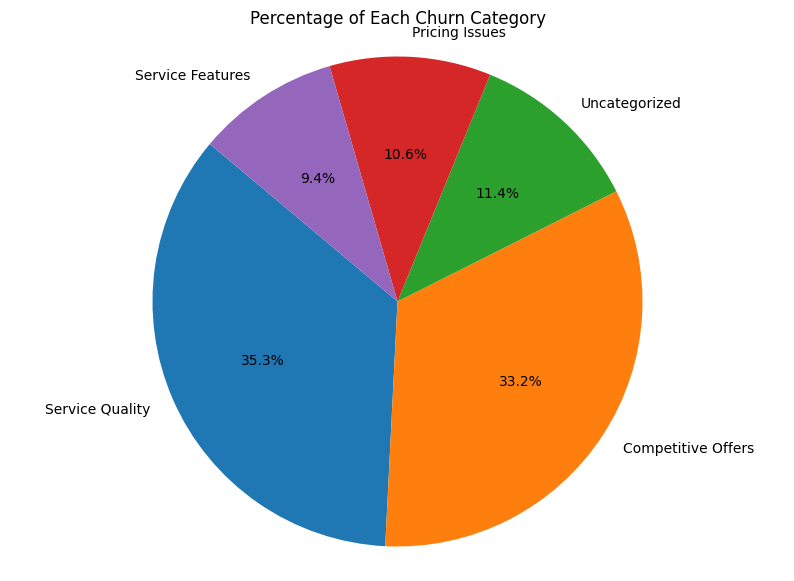

In [ ]:
# Filter out 'Unknown' category
filtered_df = df_2[df_2['Category'] != 'Unknown']

# Count the occurrences of each category
category_counts = filtered_df['Category'].value_counts()

# Calculate the percentage of each category
category_percentages = category_counts / category_counts.sum() * 100

# Plotting the pie chart
plt.figure(figsize=(10, 7))  # Set the figure size
plt.pie(category_percentages, labels=category_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Each Churn Category')  # Adding a title to the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

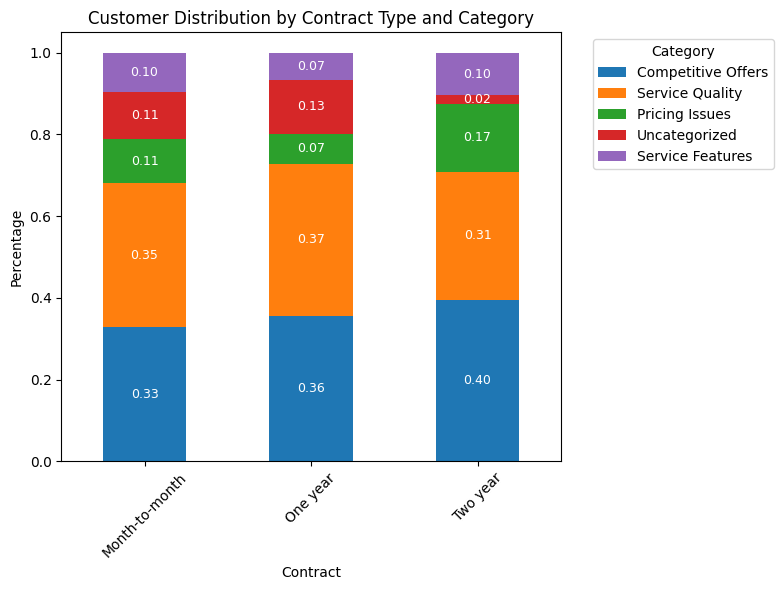

In [ ]:
# Group by Contract and Category, count occurrences, normalize within each contract type, and unstack
grouped = filtered_df.groupby('Contract')['Category'].value_counts().groupby(level=0).apply(lambda x: x / x.sum()).unstack('Category')

# Sort the columns by the sum of their values across all contract types (for consistent order in all bars)
ordered_columns = grouped.sum().sort_values(ascending=False).index
grouped = grouped[ordered_columns]

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
grouped.plot(kind='bar', stacked=True, ax=ax)

ax.set_ylabel('Percentage')
ax.set_xlabel('Contract')
ax.set_title('Customer Distribution by Contract Type and Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# Customizing X-axis labels
contract_labels = ['Month-to-month', 'One year', 'Two year']  # Example labels
ax.set_xticklabels(contract_labels, rotation=45)  # Set custom labels and rotate for better readability

# Move the legend outside of the plot
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')


# Adding percentage annotations within each bar segment
for n, rect in enumerate(ax.patches):  # iterate over each bar patch
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_x(), rect.get_y()
    label_text = f'{height:.2f}'  # Format the number into a percentage string with one decimal place
    if height > 0:  # only add text annotations if the height is greater than 0
        ax.text(x + width / 2, y + height / 2, label_text, ha='center', va='center', fontsize=9, color='white')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Filter out rows where 'Churn Reason' is null
filtered_df = df[df['Churn Reason'].notna()]

# Create a pivot table
pivot_table = pd.pivot_table(
    filtered_df,
    values='CustomerID',  # Use CustomerID to count occurrences
    index='Churn Reason',
    columns='Contract',
    aggfunc='count'
)

# Convert counts to percentage of totals by contract type
pivot_percentage = pivot_table.apply(lambda x: x / x.sum() * 100).round(2)

# Display the pivot table with percentages
print(pivot_percentage)


Contract                                   Month-to-month  One year  Two year
Churn Reason                                                                 
Attitude of service provider                         6.95     10.24      6.25
Attitude of support person                          10.51      9.64      4.17
Competitor had better devices                        7.01      6.02      8.33
Competitor made better offer                         7.61      6.02      8.33
Competitor offered higher download speeds            9.73     13.86     10.42
Competitor offered more data                         8.46      9.64     12.50
Deceased                                             0.36       NaN       NaN
Don't know                                           8.52      7.23      2.08
Extra data charges                                   3.20      0.60      6.25
Lack of affordable download/upload speed             2.18      3.01      6.25
Lack of self-service on Website                      5.08      1

In [ ]:
top_5_reasons = {}
for column in pivot_percentage.columns:
    top_5 = pivot_percentage[column].sort_values(ascending=False).head(5)
    top_5_reasons[column] = top_5

# Display the results as separate tables for each contract type
print("Top 5 Churn Reasons by Contract Type:")
for contract, reasons in top_5_reasons.items():
    print(f"\nContract Type: {contract}")
    print(reasons)

Top 5 Churn Reasons by Contract Type:

Contract Type: Month-to-month
Churn Reason
Attitude of support person                   10.51
Competitor offered higher download speeds     9.73
Don't know                                    8.52
Competitor offered more data                  8.46
Competitor made better offer                  7.61
Name: Month-to-month, dtype: float64

Contract Type: One year
Churn Reason
Competitor offered higher download speeds    13.86
Attitude of service provider                 10.24
Competitor offered more data                  9.64
Attitude of support person                    9.64
Don't know                                    7.23
Name: One year, dtype: float64

Contract Type: Two year
Churn Reason
Product dissatisfaction                      14.58
Competitor offered more data                 12.50
Competitor offered higher download speeds    10.42
Competitor had better devices                 8.33
Competitor made better offer                  8.33
Name: Two

# Monthly Contract Customer Churn


In [ ]:
contract_counts = df['Contract'].value_counts()
contract_percentage = round((contract_counts / len(df)) * 100 , 2)

# Print the percentages
print(contract_percentage)

Contract
Month-to-month    55.02
Two year          24.07
One year          20.91
Name: count, dtype: float64


In [ ]:
monthly_df = df[df['Contract'] == 'Month-to-month']

In [ ]:
monthly_columns = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
    'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
    'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
    'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'
]

pivot_tables = {}

for column in columns:
    pt = monthly_df.pivot_table(index=column, values='Churn Value', aggfunc=['count', 'sum'])
    pt["Churn %"] = round(pt["sum"]/pt["count"], 2)
    pivot_tables[column] = pt

# Display the pivot tables
for column, pt in pivot_tables.items():
    print(f"Pivot Table for {column}:\n{pt}\n")


Pivot Table for Gender:
             count         sum Churn %
       Churn Value Churn Value        
Gender                                
Female        1925         842    0.44
Male          1950         813    0.42

Pivot Table for Senior Citizen:
                     count         sum Churn %
               Churn Value Churn Value        
Senior Citizen                                
No                    3068        1214    0.40
Yes                    807         441    0.55

Pivot Table for Partner:
              count         sum Churn %
        Churn Value Churn Value        
Partner                                
No             2495        1115    0.45
Yes            1380         540    0.39

Pivot Table for Dependents:
                 count         sum Churn %
           Churn Value Churn Value        
Dependents                                
No                3239        1549    0.48
Yes                636         106    0.17

Pivot Table for Tenure Months:
           

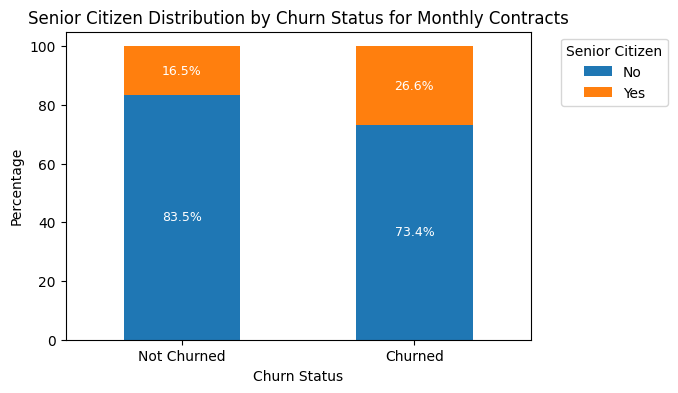

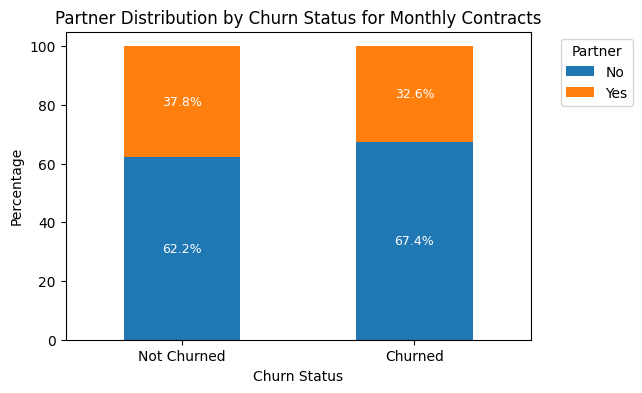

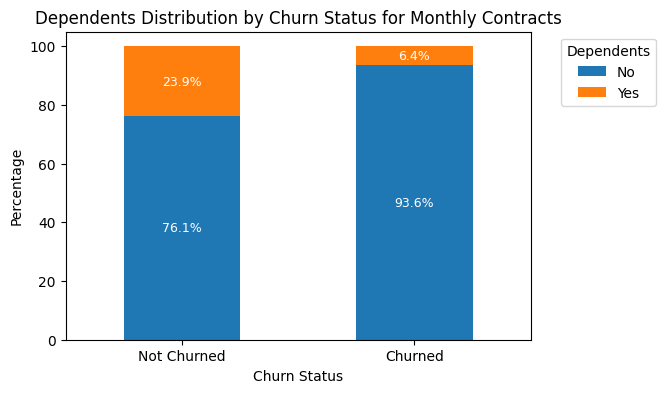

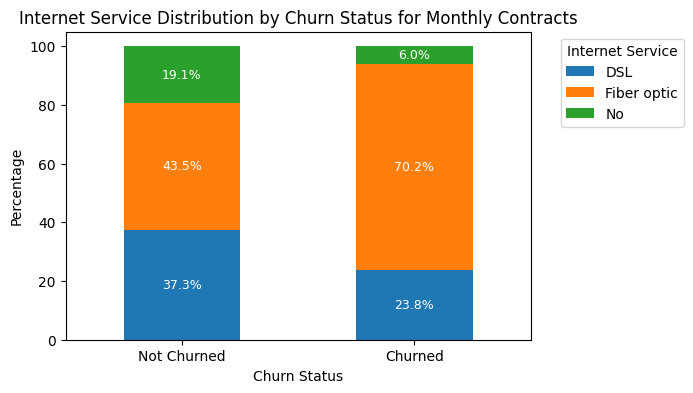

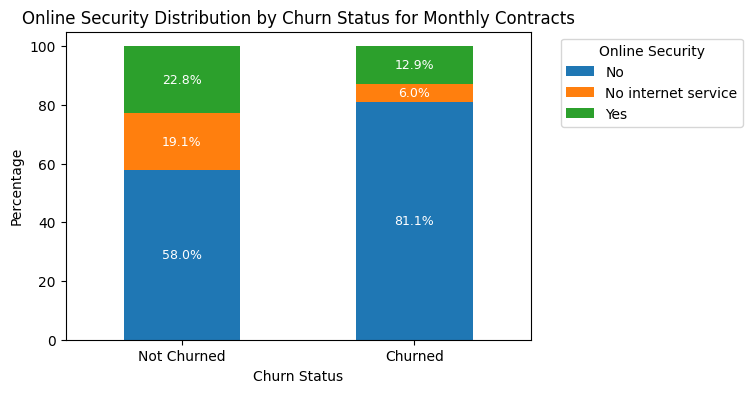

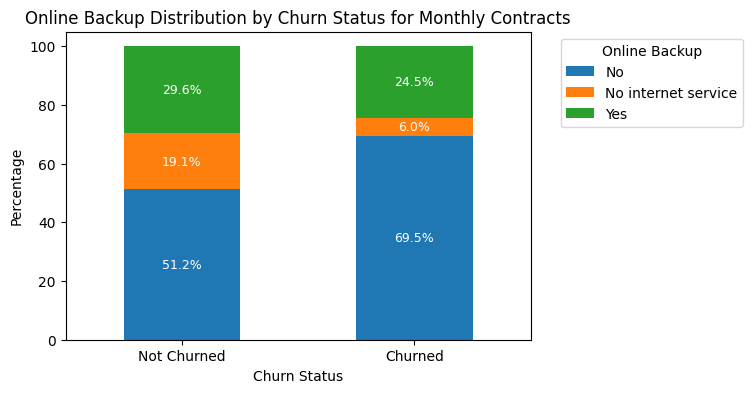

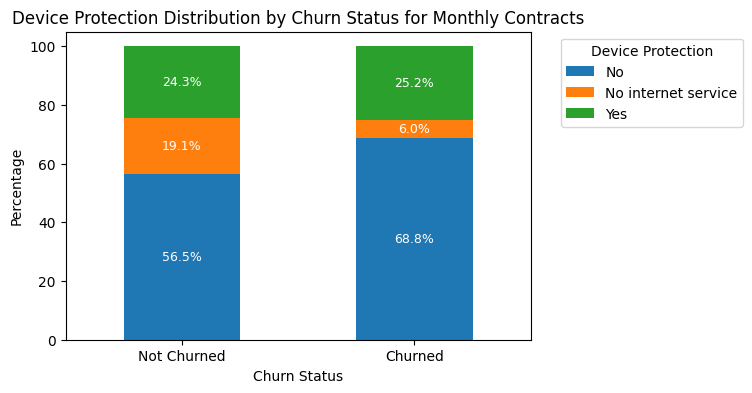

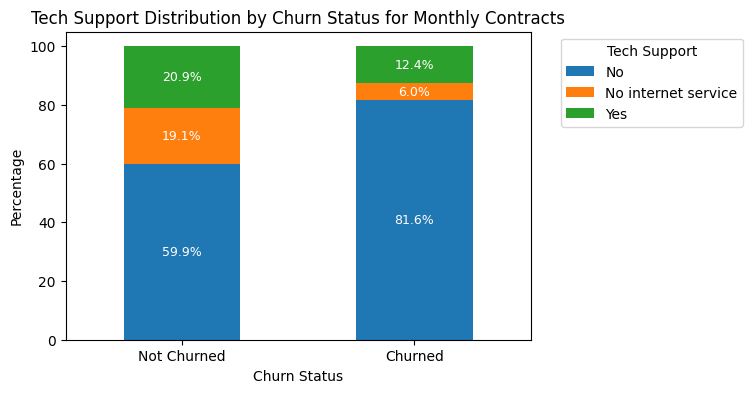

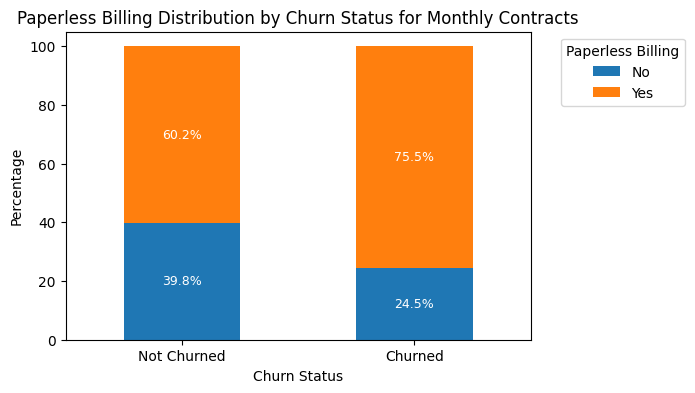

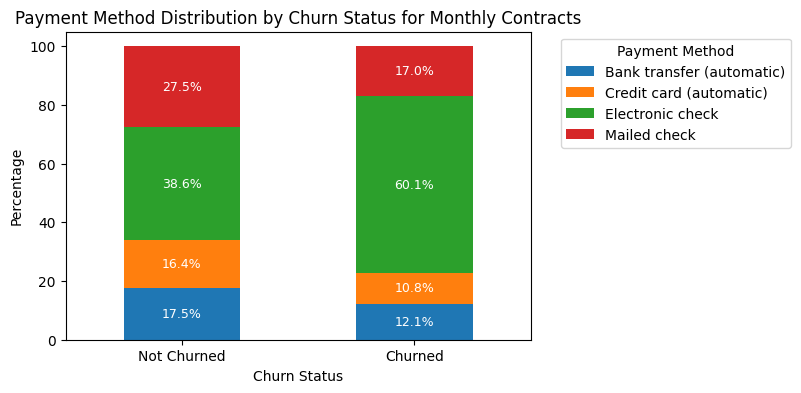

In [ ]:
monthly_columns_2 = [
   'Senior Citizen', 'Partner', 'Dependents', 'Internet Service',
   'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
   'Paperless Billing', 'Payment Method'
]



def plot_stacked_bars(dataframe, columns):
    for column in columns:
        # Grouping data by 'Churn Label' and another column, then unstacking for plotting
        grouped = dataframe.groupby(['Churn Label', column]).size().unstack(fill_value=0)

        # Change index names from 'Yes' and 'No' to 'Churned' and 'Not Churned'
        grouped.index = grouped.index.map({'Yes': 'Churned', 'No': 'Not Churned'})

        # Calculate the percentage for each category
        grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

        # Create stacked bar plot
        ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(6, 4))
        ax.set_title(f'{column} Distribution by Churn Status for Monthly Contracts')
        ax.set_xlabel('Churn Status')
        ax.set_ylabel('Percentage')
        plt.xticks(rotation=360)
        ax.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')

        # Annotating the percentage on the bars
        for rec in ax.patches:
            height = rec.get_height()
            if height > 0:  # only display if there's height (or percentage) to show
                x = rec.get_x() + rec.get_width() / 2
                y = rec.get_y() + rec.get_height() / 2
                label = f"{height:.1f}%"
                ax.text(x, y, label, ha='center', va='center', color='white', fontsize=9)

        plt.show()

# Assuming monthly_df is the DataFrame filtered for 'Month-to-month' contracts
plot_stacked_bars(monthly_df, monthly_columns_2)


In [ ]:
monthly_df_fiberoptic = monthly_df[monthly_df['Internet Service'] == 'Fiber optic']

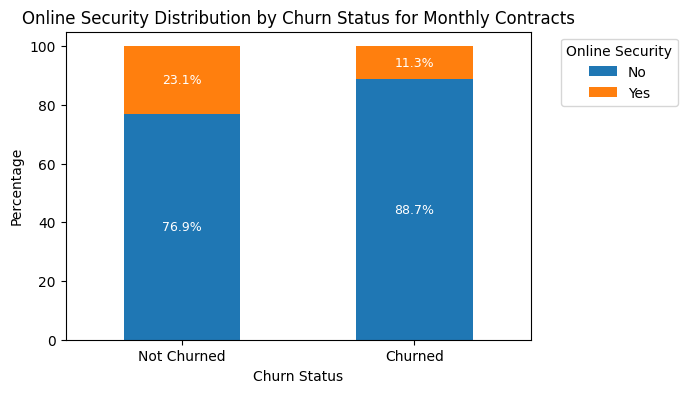

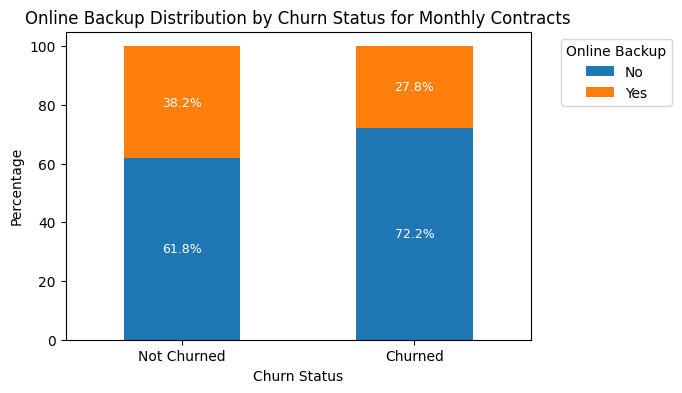

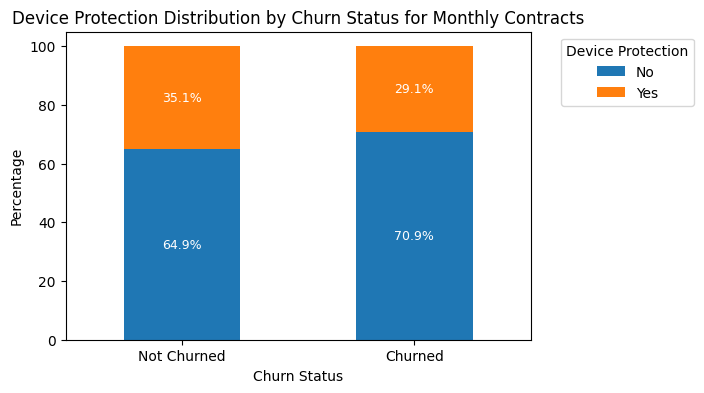

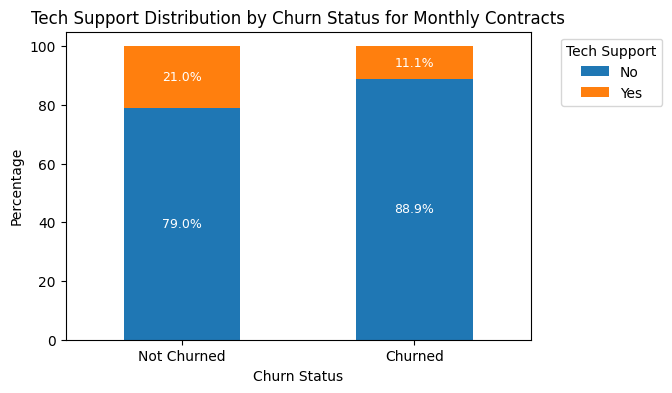

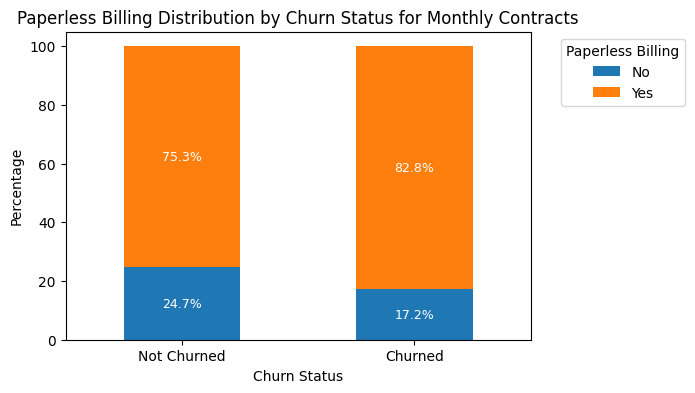

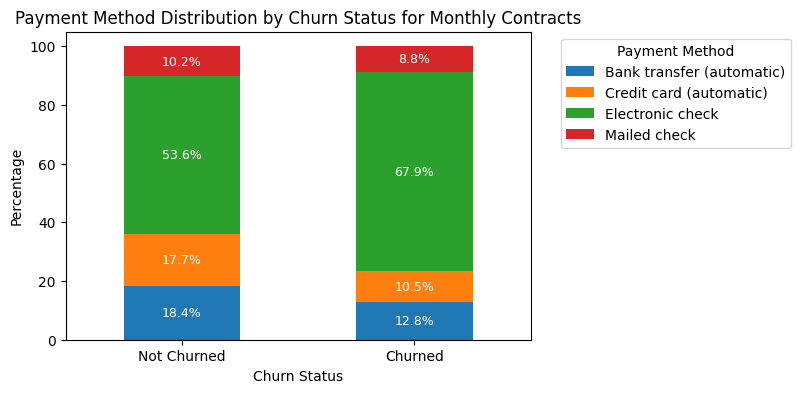

In [ ]:
monthly_columns_3 = [
   'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
   'Paperless Billing', 'Payment Method'
]



def plot_stacked_bars(dataframe, columns):
    for column in columns:
        # Grouping data by 'Churn Label' and another column, then unstacking for plotting
        grouped = dataframe.groupby(['Churn Label', column]).size().unstack(fill_value=0)

        # Change index names from 'Yes' and 'No' to 'Churned' and 'Not Churned'
        grouped.index = grouped.index.map({'Yes': 'Churned', 'No': 'Not Churned'})

        # Calculate the percentage for each category
        grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

        # Create stacked bar plot
        ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(6, 4))
        ax.set_title(f'{column} Distribution by Churn Status for Monthly Contracts')
        ax.set_xlabel('Churn Status')
        ax.set_ylabel('Percentage')
        plt.xticks(rotation=360)
        ax.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')

        # Annotating the percentage on the bars
        for rec in ax.patches:
            height = rec.get_height()
            if height > 0:  # only display if there's height (or percentage) to show
                x = rec.get_x() + rec.get_width() / 2
                y = rec.get_y() + rec.get_height() / 2
                label = f"{height:.1f}%"
                ax.text(x, y, label, ha='center', va='center', color='white', fontsize=9)

        plt.show()

# Assuming monthly_df is the DataFrame filtered for 'Month-to-month' contracts
plot_stacked_bars(monthly_df_fiberoptic, monthly_columns_3)


## Why monthly customer churn?

Utilize ChatGPT to categorize these reasons:

Competitive Reasons: Reasons involving competitors' offerings.
* Competitor offered higher download speeds
* Competitor offered more data
* Competitor made better offer
* Competitor had better devices

Service Quality: Issues directly related to the service quality and reliability.
* Attitude of support person
* Attitude of service provider
* Network reliability
* Service dissatisfaction
* Poor expertise of online support
* Poor expertise of phone support

Cost Issues: Churn due to pricing and related expenses.
* Price too high
* Extra data charges
* Long distance charges

Product Features: Dissatisfaction with the product itself or available features.
* Lack of affordable download/upload speed
* Lack of self-service on Website
* Product dissatisfaction
* Limited range of services

Miscellaneous Reasons:
* Don't know
* Moved
* Deceased

monthly customers churn reasons

In [ ]:
# Remove null values from 'Churn Reason'
churn_reasons = monthly_df['Churn Reason'].dropna()

# Count the occurrence of each unique reason
reason_counts = churn_reasons.value_counts()
total = reason_counts.sum()
percentages = (reason_counts / total * 100).round(2)  # Round to two decimal places

# Create a DataFrame to display the table
table = pd.DataFrame({
    'Churn Reason': reason_counts.index,
    'Count': reason_counts.values,
    'Percentage': percentages.values
})

# Print the DataFrame
display(table)

,Churn Reason,Count,Percentage
0,Attitude of support person,174,10.51
1,Competitor offered higher download speeds,161,9.73
2,Don't know,141,8.52
3,Competitor offered more data,140,8.46
4,Competitor made better offer,126,7.61
5,Competitor had better devices,116,7.01
6,Attitude of service provider,115,6.95
7,Network reliability,92,5.56
8,Price too high,89,5.38
9,Product dissatisfaction,85,5.14


from matplotlib import pyplot as plt
table['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
table['Percentage'].plot(kind='hist', bins=20, title='Percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
table.plot(kind='scatter', x='Count', y='Percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
table['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
table['Percentage'].plot(kind='line', figsize=(8, 4), title='Percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

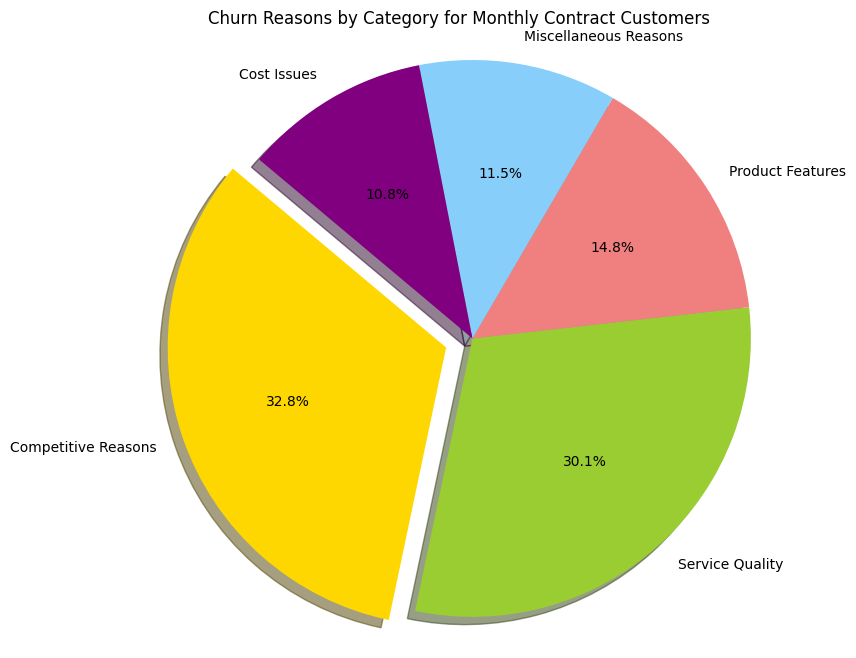

In [ ]:
# Manually entered counts for each category based on the new churn reasons and counts provided
reason_counts = {
    'Competitive Reasons': 161 + 140 + 126 + 116,  # Sum of counts for competitive reasons
    'Service Quality': 174 + 115 + 92 + 83 + 18 + 16,  # Sum of counts for service quality issues
    'Cost Issues': 89 + 53 + 37,  # Sum of counts for cost issues
    'Product Features': 36 + 84 + 85 + 40,  # Sum of counts for product features
    'Miscellaneous Reasons': 141 + 43 + 6  # Sum of counts for miscellaneous reasons
}

# Total counts calculated as the sum of all individual counts
total_counts = sum(reason_counts.values())

# Calculating percentages for each category
reason_percentages = {category: (count / total_counts) * 100 for category, count in reason_counts.items()}

# Sorting categories by percentage
sorted_categories = sorted(reason_percentages.items(), key=lambda x: x[1], reverse=True)

# Extracting sorted labels and sizes
labels = [category for category, _ in sorted_categories]
sizes = [percentage for _, percentage in sorted_categories]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple']  # Optional: choose your colors
explode = [0.1 if i == 0 else 0 for i in range(len(labels))]  # Explode the largest slice

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Churn Reasons by Category for Monthly Contract Customers')
plt.show()



monthly customers who used fiber optic churn reasons

In [ ]:
# Remove null values from 'Churn Reason'
churn_reasons = monthly_df_fiberoptic['Churn Reason'].dropna()

# Count the occurrence of each unique reason
reason_counts = churn_reasons.value_counts()
total = reason_counts.sum()
percentages = (reason_counts / total * 100).round(2)  # Round to two decimal places

# Create a DataFrame to display the table
table = pd.DataFrame({
    'Churn Reason': reason_counts.index,
    'Count': reason_counts.values,
    'Percentage': percentages.values
})

# Print the DataFrame
print(table)

                                 Churn Reason  Count  Percentage
0                  Attitude of support person    122       10.50
1   Competitor offered higher download speeds    113        9.72
2                Competitor offered more data    106        9.12
3                Competitor made better offer     94        8.09
4                                  Don't know     90        7.75
5                Attitude of service provider     85        7.31
6               Competitor had better devices     72        6.20
7                              Price too high     67        5.77
8                         Network reliability     62        5.34
9                     Service dissatisfaction     60        5.16
10            Lack of self-service on Website     58        4.99
11                    Product dissatisfaction     56        4.82
12                         Extra data charges     40        3.44
13                                      Moved     34        2.93
14                      L

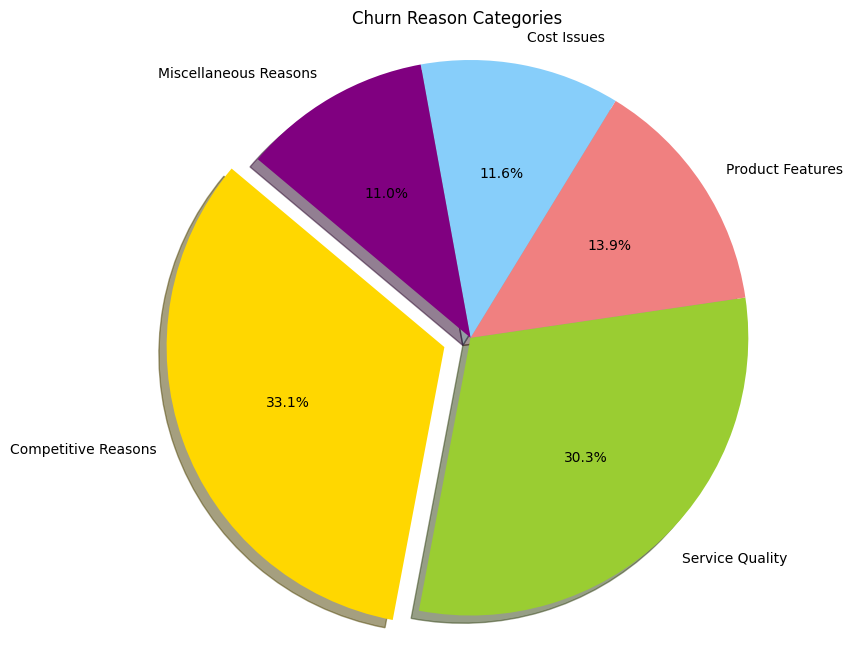

In [ ]:
# Data setup
reason_counts = {
    'Competitive Reasons': 113 + 106 + 94 + 72,  # Sum of counts for competitive reasons
    'Service Quality': 122 + 85 + 62 + 60 + 12 + 11,  # Sum of counts for service quality issues
    'Product Features': 23 + 58 + 56 + 25,  # Sum of counts for product features
    'Cost Issues': 67 + 40 + 28,  # Sum of counts for cost issues
    'Miscellaneous Reasons': 90 + 34 + 4  # Sum of counts for miscellaneous reasons
}

# Total counts calculated as the sum of all individual counts
total_counts = sum(reason_counts.values())

# Calculating percentages for each category
reason_percentages = {category: (count / total_counts) * 100 for category, count in reason_counts.items()}

# Data for plotting
labels = reason_percentages.keys()
sizes = reason_percentages.values()
# colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple']  # Optional: choose your colors
# explode = (0.1, 0, 0, 0, 0)  # explode the 1st slice if desired

# Plotting the pie chart
plt.figure(figsize=(10, 8))  # Optional: specify the size of the figure
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Churn Reason Categories')
plt.show()
